In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.metrics import r2_score

In [2]:
# Define the two functions
square_wave = lambda t, f0: np.sign(np.sin(2.0 * np.pi * f0 * t))
square_wave_fourier = lambda t, f0, N:\
    sum([
        np.sin(2 * np.pi * (2*k + 1) * f0 * t) / (2*k + 1)
        for k in range(N)]
    ) * (4/np.pi)


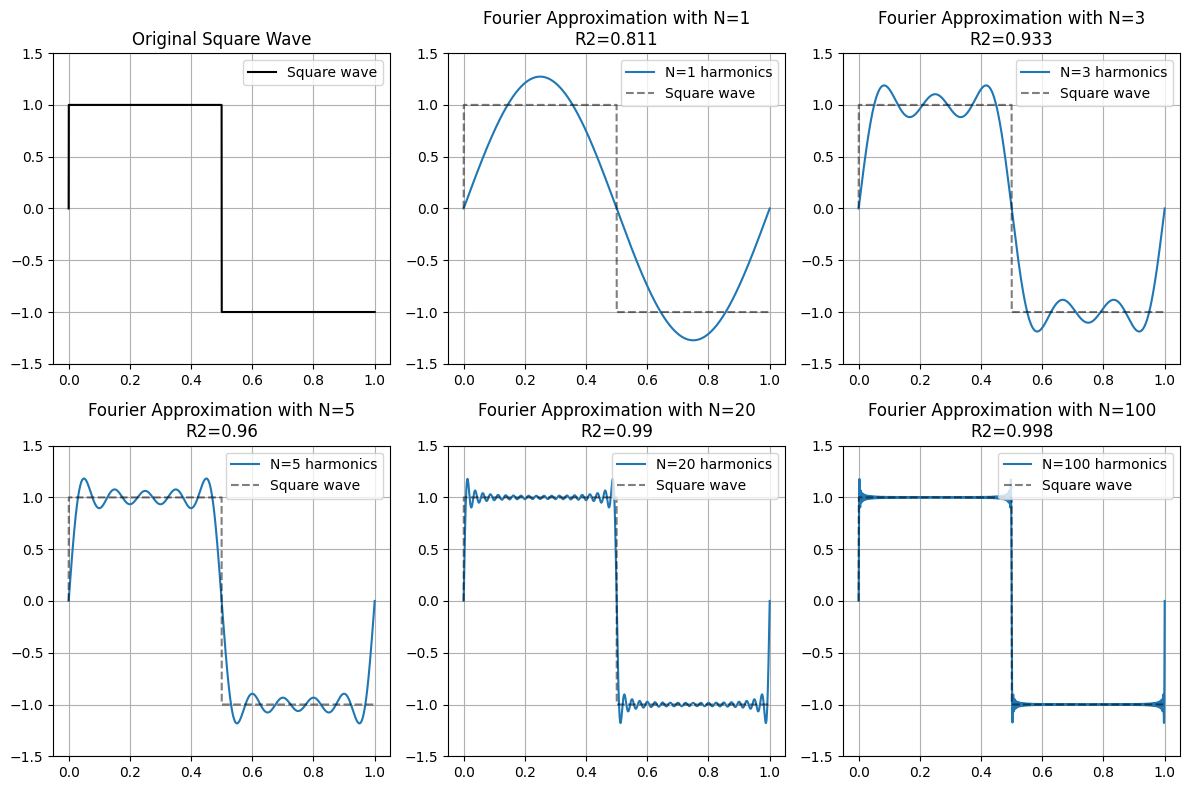

In [4]:
x = np.linspace(0.0, 1.0, 2048, endpoint=True)
# Generate the original square wave
square = square_wave(x, 1.0)

plt.figure(figsize=(12, 8))
# Plot the original square wave
plt.subplot(2, 3, 1)
plt.plot(x, square, 'k', label="Square wave")
plt.title("Original Square Wave")
plt.ylim(-1.5, 1.5)
plt.grid(True)
plt.legend()
# Plot Fourier reconstructions under different number of harmonics
for i, Nh in enumerate([1,3,5,20,100], start=2):
    plt.subplot(2, 3, i)
    y = square_wave_fourier(x, 1.0, Nh)
    plt.plot(x, y, label=f"N={Nh} harmonics")
    plt.plot(x, square, 'k--', alpha=0.5, label="Square wave")
    plt.title(f"Fourier Approximation with N={Nh}\nR2={round(r2_score(square,y),3)}")
    plt.ylim(-1.5, 1.5)
    plt.grid(True)
    plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

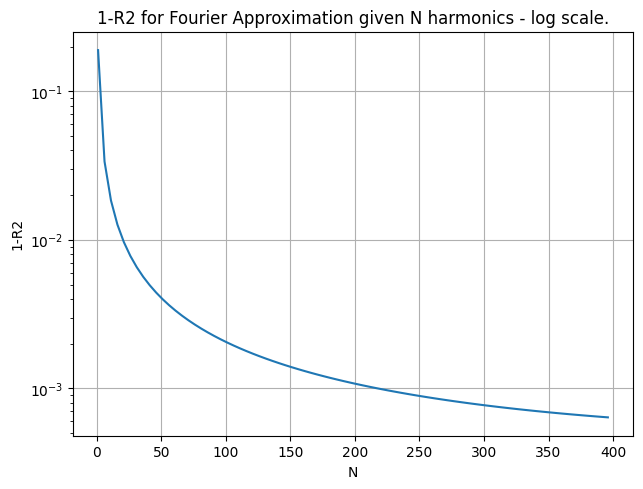

In [8]:
Ns = list(range(1,400,5))
y = [1-r2_score(square,square_wave_fourier(x, 1.0, Nh)) for Nh in Ns]
plt.plot(Ns, y, )
plt.title("1-R2 for Fourier Approximation given N harmonics - log scale.")
plt.grid(True)
plt.tight_layout()
plt.yscale('log')
plt.xlabel('N')
plt.ylabel('1-R2')
plt.show()